In [5]:
import math


def sigmoid(z):
    """ Sigmoid function """
    return 1.0 / (1.0 + math.exp(-z))


def g(theta, x):
    """ Predict the probability that x is positive """
    return sum([theta[i] * x[i] for i in range(len(x))])


def hypothesis(theta, x):
    """ Hypothesis function """
    return sigmoid(g(theta, x))


def cost(x, y, theta):
    """ Cost function """
    m = len(x)
    cost = 0.0
    for i in range(m):
        h = hypothesis(theta, x[i])
        cost += -y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h)
    return cost / m


def gradient(x, y, theta):
    """ Gradient of the cost function """
    m = len(x)
    n = len(x[0])
    grad = [0.0] * n
    for j in range(n):
        temp = 0.0
        for i in range(m):
            temp += (hypothesis(theta, x[i]) - y[i]) * x[i][j]
        grad[j] = temp / m
    return grad


def gradient_descent(x, y, theta, alpha, num_iters):
    """ Gradient descent algorithm """
    n = len(x[0])
    for i in range(num_iters):
        grad = gradient(x, y, theta)
        theta = [theta[i] - alpha * grad[i] for i in range(n)]
        if i % 500 == 0:
            print('Cost at iteration', i, ':', cost(x, y, theta))

    return theta


def polynomial(X):
    """
    将二元特征转化为二元二次多项式特征
    """
    new_X = []
    m = len(X)
    for i in range(m):
        x1, x2 = X[i]
        new_X.append([1, x1, x2, x1**2, x2**2, x1*x2])  # 6 项
    return new_X

Cost at iteration 0 : 0.6927350280982435
Cost at iteration 500 : 0.5720489690748513
Cost at iteration 1000 : 0.5214702118281603
Cost at iteration 1500 : 0.4897093939033668
Cost at iteration 2000 : 0.46521688935194005
Cost at iteration 2500 : 0.44447190363349054
Cost at iteration 3000 : 0.42611648008569275
Cost at iteration 3500 : 0.4095200738543227
Cost at iteration 4000 : 0.3943384569552295
Cost at iteration 4500 : 0.3803549363708217
Cost at iteration 5000 : 0.3674162726653325
Cost at iteration 5500 : 0.35540440901665404
Cost at iteration 6000 : 0.3442230027237387
Cost at iteration 6500 : 0.3337905134273731
Cost at iteration 7000 : 0.32403636671552244
Cost at iteration 7500 : 0.3148986371973293
Cost at iteration 8000 : 0.30632252294292084
Cost at iteration 8500 : 0.29825925693480015
Cost at iteration 9000 : 0.29066527665993114
Cost at iteration 9500 : 0.2835015580567856


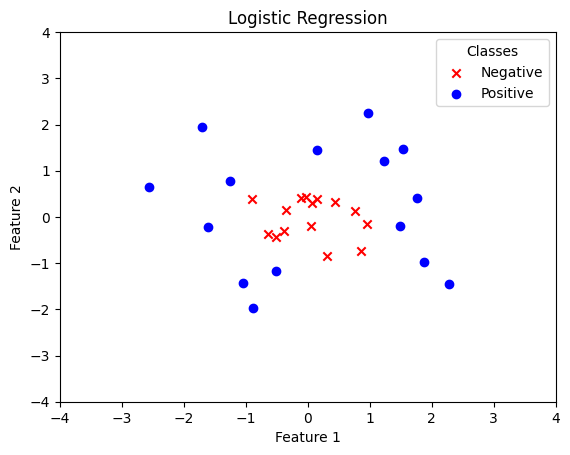

In [19]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

X, y = make_gaussian_quantiles(
    n_samples=30, n_features=2, n_classes=2, random_state=0)

for i, marker in enumerate(['x', 'o']):
    plt.scatter(X[y == i, 0], X[y == i, 1],
                marker=marker, c=['red', 'blue'][i], label=['Negative', 'Positive'][i])

# 添加图例
plt.legend(title="Classes")
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-4, 4)
plt.ylim(-4, 4)

new_X = polynomial(X)
y = y
m = len(new_X)
n = len(new_X[0])
alpha = 0.001
num_iters = 10000

theta = [0.0] * n
theta = gradient_descent(new_X, y, theta, alpha, num_iters)

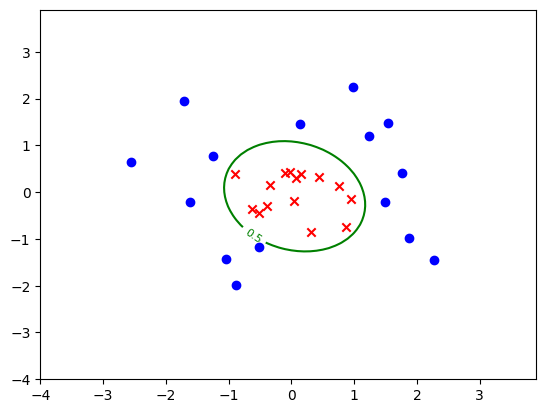

In [18]:
import numpy as np

# 使用等高线图绘制决策边界
x1 = [i / 10.0 for i in range(-40, 40)]
x2 = [i / 10.0 for i in range(-40, 40)]
X1, X2 = [arr.ravel() for arr in np.meshgrid(x1, x2)]
z = []
for i in range(len(X1)):
    temp = hypothesis(theta, [1, X1[i], X2[i], X1[i]
                      ** 2, X2[i]**2, X1[i]*X2[i]])
    z.append(temp)
z = np.array(z).reshape(len(x1), len(x2))

contour = plt.contour(x1, x2, z, levels=[0.5], colors='green')
# 在等高线上添加数值标签
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

for i, marker in enumerate(['x', 'o']):
    plt.scatter(X[y == i, 0], X[y == i, 1],
                marker=marker, c=['red', 'blue'][i], label=['Negative', 'Positive'][i])

In [58]:
import numpy as np
x1 = [1, 2, 3]
x2 = [4, 5, 6]


X1, X2 = np.meshgrid(x1, x2)


def test(X1, X2):
    print('X1:', X1)
    print('X2:', X2)


test(X1, X2)

X1: [[1 2 3]
 [1 2 3]
 [1 2 3]]
X2: [[4 4 4]
 [5 5 5]
 [6 6 6]]
